In [224]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [225]:
df=pd.read_csv(r"C:\Users\anjup\Downloads\car_age_price.csv")

In [226]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [228]:
#CHECK IF THERE IS ANY MISSING VALUES
df.isnull().sum()

Year     0
Price    0
dtype: int64

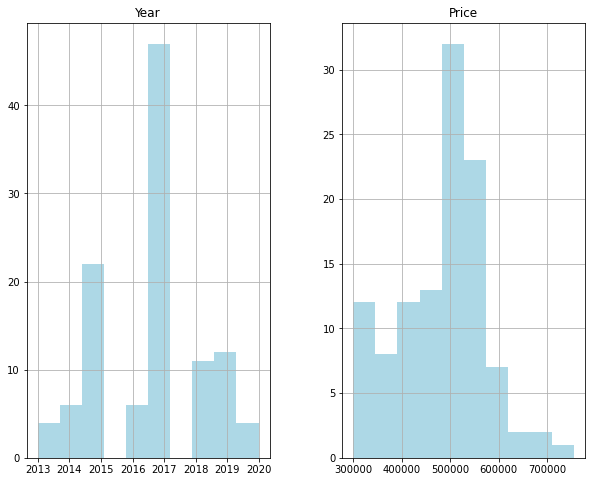

In [229]:
#Plotting the data to see the distribution
df.hist(figsize=(10,8), color= 'lightblue')
plt.show()

In [230]:
#FIND THE CORRELATION
corr_matrix=df.corr()

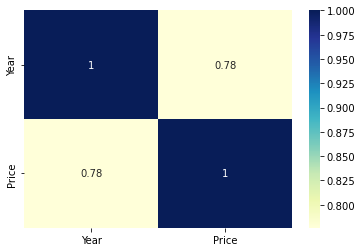

In [231]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

In [232]:
#Taking Year as an independent variable
x= df.drop(['Price'],axis=1)
x


,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [261]:
#Taking Price as target variable
y=df['Price'].squeeze()
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

# LINEAR REGRESSION

In [234]:
#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [272]:
#create and fit the linear regression model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
model=linear_regression.fit(x_train,y_train)


In [273]:
#Making predictions
linear_prediction=model.predict(x_test)


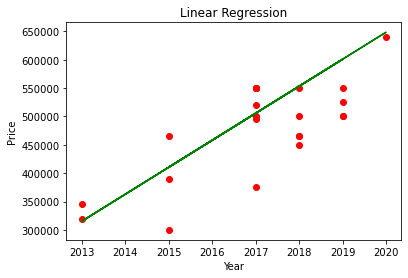

In [274]:
linear_prediction =model.predict(x_test)
plt.scatter (x_test.squeeze(),y_test,color='r')
plt.plot(x_test.squeeze(),linear_prediction,color='green')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

In [300]:
#The coefficient values indicate the strength and direction of the relationship between the independent variable (year) and the target variable (price). 
linear_coefficients = linear_regression.coef_
linear_coefficients

array([47608.56780808])

In [275]:
#checking the performance of Linear regression with evaluation of metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [276]:
print('Mean Squared Error(MSE) :',mean_squared_error(y_test,linear_predictions))
print('Rsquared value=',r2_score(y_test,linear_predictions))
print("Mean Absolute Error :",mean_absolute_error(y_test,linear_predictions))
RMSE= np.sqrt(mean_squared_error(y_test,linear_predictions))
print("Root Mean sqaured Error  :" ,RMSE)
print("Linear Regression Score",linear_regression.score(x_test,y_test))

Mean Squared Error(MSE) : 4326906256.829671
Rsquared value= 0.36759313425902185
Mean Absolute Error : 53534.77957001264
Root Mean sqaured Error  : 65779.22359552195
Linear Regression Score 0.36759313425902185


# LASSO REGRESSION

In [304]:
#create and fit the linear regression model
from sklearn.linear_model import Lasso
lasso_regression=Lasso(alpha=1.0)
model1=lasso_regression.fit(x_train,y_train)

In [305]:
#Making predictions
lasso_predictions=model1.predict(x_test)

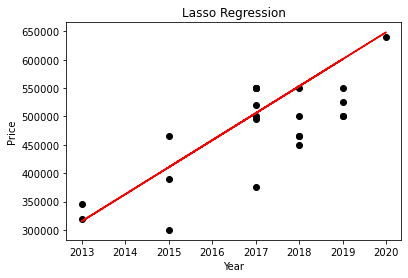

In [306]:
lasso_predictions =model1.predict(x_test)
plt.scatter (x_test.squeeze(),y_test,color='black')
plt.plot(x_test.squeeze(),linear_prediction,color='r')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression')
plt.show()

In [307]:
##The coefficient values indicate the strength and direction of the relationship between the independent variable (year) and the target variable (price). 
lasso_coefficients = lasso_regression.coef_
lasso_coefficients

array([47608.1555995])

In [308]:
#checking the performance of Lasso regression with evaluation of metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [309]:
print("Mean Absolute Error",mean_absolute_error(y_test,lasso_predictions))
print('Mean Squared Error(MSE) :',mean_squared_error(y_test,lasso_predictions))
print('Rsquared value=',r2_score(y_test,lasso_predictions))
RMSE= np.sqrt(mean_squared_error(y_test,lasso_predictions))
print("Root Mean sqaured Error  :" ,RMSE)
print("Lasso Regression Score",lasso_regression.score(x_test,y_test))

Mean Absolute Error 53534.33030898286
Mean Squared Error(MSE) : 4326859771.015669
Rsquared value= 0.3675999284778446
Root Mean sqaured Error  : 65778.8702473345
Lasso Regression Score 0.3675999284778446


# Predicting the possible price of a 2022 model second-hand grand i10

In [310]:
year_2022 = pd.DataFrame({'Year': [2022]})
linear_price_2022 = linear_regression.predict(year_2022)
lasso_price_2022 = lasso_regression.predict(year_2022)

print("Predicted Price of 2022 model (Linear Regression):", linear_price_2022[0])
print("Predicted Price of 2022 model (Lasso Regression):", lasso_price_2022[0])

Predicted Price of 2022 model (Linear Regression): 743601.6159450412
Predicted Price of 2022 model (Lasso Regression): 743599.3742714375


# Observations according to the metrics

Mean Squared Error (MSE): The MSE for both models is very close, with the Linear Regression model having an MSE of 4,326,906,256.83 and the Lasso Regression model having an MSE of 4,326,859,771.02. Lower values of MSE indicate better performance, so the Lasso Regression model has a slightly lower MSE.

R-squared value: Both models have similar R-squared values, with the Linear Regression model having an R-squared value of 0.3676 and the Lasso Regression model having an R-squared value of 0.3676. In this case, both models explain approximately 36.76% of the variance in the price.

Mean Absolute Error (MAE): The MAE for both models is also very close, with the Linear Regression model having an MAE of 53,534.78 and the Lasso Regression model having an MAE of 53,534.33. Lower values of MAE indicate better performance, but the difference between the two models is minimal.

Root Mean Squared Error (RMSE): The RMSE for both models is very close as well, with the Linear Regression model having an RMSE of 65,779.22 and the Lasso Regression model having an RMSE of 65,778.87. Lower values of RMSE indicate better performance, but the difference between the two models is minimal.

# Result 

Based on these metrics, it can be concluded that both models have very similar performance on the given dataset. 

Based on the predicted prices for the 2022 model, the Linear Regression model and Lasso Regression model provide similar results. The predicted price using Linear Regression is 743,601.62, and the predicted price using Lasso Regression is 743,599.37. The difference between the two predictions is negligible.

In this case, both models perform similarly, and the difference in predicted prices is minimal. 